# [作業目標]
- 對資料做更多處理 : 顯示特定欄位的統計值與直方圖

# [作業重點]
- 試著顯示特定欄位的基礎統計數值 (In[4], Out[4], Hint : describe())
- 試著顯示特定欄位的直方圖 (In[5], Out[5], Hint : .hist())

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

# 設定 data_path
dir_data = '../data/'

In [2]:
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

## 練習時間

觀察有興趣的欄位的資料分佈，並嘗試找出有趣的訊息
#### Eg
- 計算任意欄位的平均數及標準差
- 畫出任意欄位的[直方圖](https://zh.wikipedia.org/zh-tw/%E7%9B%B4%E6%96%B9%E5%9B%BE)

### Hints:
- [Descriptive Statistics For pandas Dataframe](https://chrisalbon.com/python/data_wrangling/pandas_dataframe_descriptive_stats/)
- [pandas 中的繪圖函數](https://amaozhao.gitbooks.io/pandas-notebook/content/pandas%E4%B8%AD%E7%9A%84%E7%BB%98%E5%9B%BE%E5%87%BD%E6%95%B0.html)


In [4]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
app_train_male = app_train[app_train.CODE_GENDER == "M"]
app_train_female = app_train[app_train.CODE_GENDER == "F"]

In [10]:
app_train_male.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,105059.000000,105059.000000,105059.000000,1.050590e+05,1.050590e+05,105055.000000,1.049700e+05,105059.000000,105059.000000,105059.000000,...,105059.000000,105059.000000,105059.000000,105059.000000,89724.000000,89724.000000,89724.000000,89724.000000,89724.000000,89724.000000
mean,278076.627828,0.101419,0.464548,1.933965e+05,6.110952e+05,28657.681177,5.499423e+05,0.021138,-15140.050562,33220.412187,...,0.010899,0.000752,0.000609,0.000942,0.006776,0.007178,0.033915,0.278855,0.257166,1.852091
std,102802.696800,0.301884,0.750999,1.345972e+05,4.115242e+05,15140.183335,3.792757e+05,0.014199,4157.351621,108318.573805,...,0.103827,0.027412,0.024674,0.030683,0.087432,0.112689,0.206549,0.922441,0.601372,1.825496
min,100002.000000,0.000000,0.000000,2.700000e+04,4.500000e+04,1980.000000,4.050000e+04,0.000533,-25196.000000,-16836.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,188904.000000,0.000000,0.000000,1.350000e+05,2.750400e+05,17739.000000,2.430000e+05,0.010006,-18278.500000,-2665.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278240.000000,0.000000,0.000000,1.800000e+05,5.212800e+05,26446.500000,4.500000e+05,0.018850,-14704.000000,-1277.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,366878.500000,0.000000,1.000000,2.250000e+05,8.248230e+05,36459.000000,6.975000e+05,0.028663,-11699.000000,-475.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456251.000000,1.000000,14.000000,1.800009e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7676.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,8.000000,23.000000


In [12]:
app_train_female.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,202448.000000,202448.000000,202448.000000,2.024480e+05,2.024480e+05,202440.000000,2.022590e+05,202448.000000,202448.000000,202448.000000,...,202448.000000,202448.000000,202448.000000,202448.000000,176264.000000,176264.000000,176264.000000,176264.000000,176264.000000,176264.000000
mean,278235.964094,0.069993,0.392397,1.560323e+05,5.927667e+05,26304.815242,5.324062e+05,0.020728,-16502.507177,79693.262759,...,0.006693,0.000514,0.000454,0.000020,0.006212,0.006910,0.034590,0.261551,0.269703,1.924312
std,102783.824191,0.255136,0.705409,2.748256e+05,3.975816e+05,14079.757138,3.640986e+05,0.013634,4395.904085,153264.950102,...,0.081537,0.022659,0.021313,0.004445,0.081966,0.109763,0.203732,0.912641,0.875986,1.890727
min,100003.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.500000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189295.750000,0.000000,0.000000,9.900000e+04,2.700000e+05,16047.000000,2.340000e+05,0.010006,-20247.000000,-2814.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278185.500000,0.000000,0.000000,1.350000e+05,5.099220e+05,24023.250000,4.500000e+05,0.018850,-16373.000000,-1174.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367268.500000,0.000000,1.000000,1.800000e+05,8.086500e+05,33345.000000,6.795000e+05,0.028663,-12906.000000,-179.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,230161.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,23.000000,261.000000,25.000000


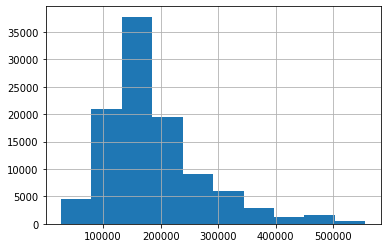

In [51]:
app_train_male[app_train_male.AMT_INCOME_TOTAL < app_train_male.AMT_INCOME_TOTAL.quantile(0.99)]["AMT_INCOME_TOTAL"].hist()

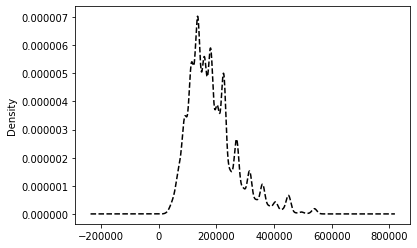

In [47]:
app_train_male[app_train_male.AMT_INCOME_TOTAL < app_train_male.AMT_INCOME_TOTAL.quantile(0.99)]["AMT_INCOME_TOTAL"].plot(kind='kde', style='k--')

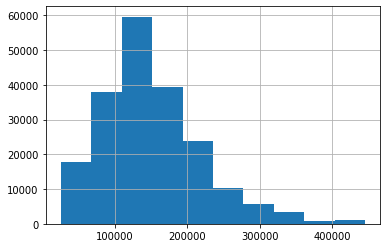

In [53]:
app_train_female[app_train_female.AMT_INCOME_TOTAL < app_train_female.AMT_INCOME_TOTAL.quantile(0.99)]["AMT_INCOME_TOTAL"].hist()

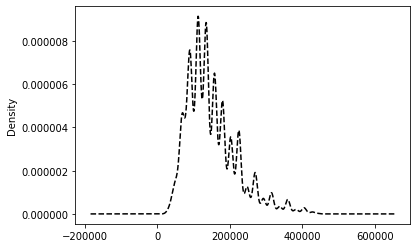

In [54]:
app_train_female[app_train_female.AMT_INCOME_TOTAL < app_train_female.AMT_INCOME_TOTAL.quantile(0.99)]["AMT_INCOME_TOTAL"].plot(kind='kde', style='k--')